<a href="https://colab.research.google.com/github/Jcorrieri/EDA_ML_Collections/blob/main/flightprices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting the Data - Flight Prices  

Creating a function to automatically download the data would be best, but our file is only available for manual download
https://www.kaggle.com/datasets/viveksharmar/flight-price-data?resource=download

In [ ]:
from pathlib import Path
import pandas as pd

# Convert csv dataset into Pandas
def csv_to_df(filepath):
  return pd.read_csv(Path(filepath))

flights = csv_to_df("flight_dataset.csv")

Conduct initial dataset overview

In [ ]:
flights.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


There are 14 attributes: Airline, Source, Destination, Total_Stops, Price, Date, Month, Year, Dep_hours, Dep_min, Arrival_hours, Arrival_min, Duration_hours, Duration_min

In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Year            10683 non-null  int64 
 8   Dep_hours       10683 non-null  int64 
 9   Dep_min         10683 non-null  int64 
 10  Arrival_hours   10683 non-null  int64 
 11  Arrival_min     10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


There are 10,683 rows. Three attributes (Airline, Source, and Destination) are string types, and the others are all integer values. However, Date, Month and Year all correspond to date values. There are no null values.

In [ ]:
flights["Airline"].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1752
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


There are 12 airlines

In [ ]:
flights["Source"].value_counts()

,count
Source,
Delhi,4537
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


There are 5 source airports

In [ ]:
flights["Destination"].value_counts()

,count
Destination,
Cochin,4537
Banglore,2871
Delhi,1265
New Delhi,932
Hyderabad,697
Kolkata,381


There are 6 destination airports

In [ ]:
flights.describe()

,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,13.508378,4.708602,2019.0,12.490686,24.411214,13.348778,24.690630,10.246560,28.327249
std,0.675199,4611.359167,8.479277,1.164357,0.0,5.748650,18.767980,6.859125,16.506036,8.494988,16.946113
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


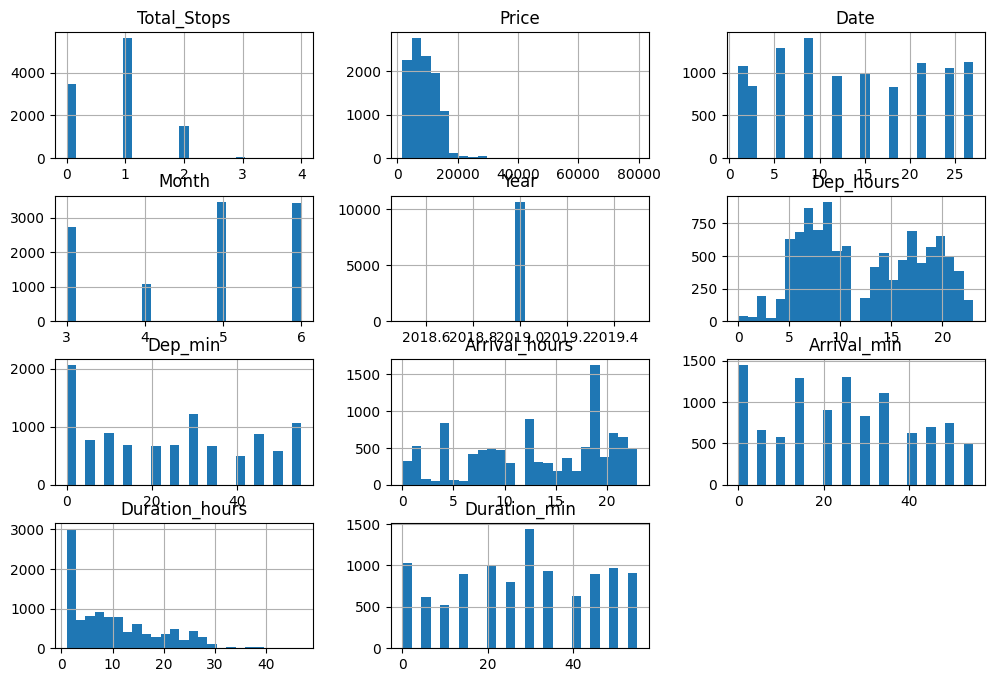

In [ ]:
import matplotlib.pyplot as plt

flights.hist(bins=25, figsize=(12,8))
plt.show()

- The data only spans four months, March-June. The date data is split across three attributes.
- The total_stops represents the number of stops made between source and destination (mostly 0-2).
- The pricing metric does not seem to be in USD. Could be an East Asian currency.
- The dep/arrival hours and minutes represent the *times* of departure and arrival, on a 24hr/60min scale.
- The flight duration is separated into hours and minutes. Could be combined.

*The attributes have very different scales, the price value is skewed right

## Creating a Training and Test Set

Since we want to reduce sampling bias on such a small set (10,000), let's use stratified sampling based on the flight duration. The idea is that the flight duration should have a correlation with the flight price, though this is purely an assumption of mine.

In [ ]:
flights["Total_duration_min"] = (flights["Duration_hours"] * 60) + flights["Duration_min"]
flights.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Total_duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45,285


<Axes: >

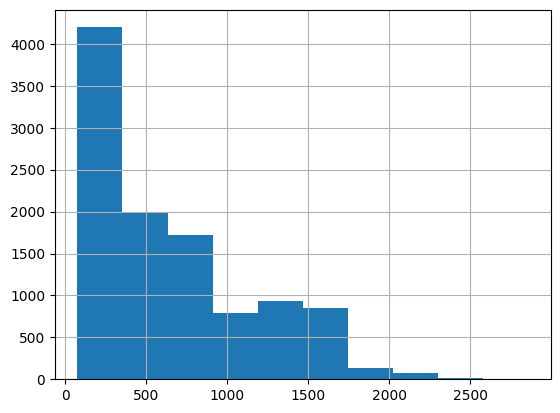

In [ ]:
flights["Total_duration_min"].hist()

In [ ]:
import numpy as np

flights["Duration_cat"] = pd.cut(flights["Total_duration_min"], bins=[0,300,650,1000,1350, np.inf], labels=[1, 2, 3, 4, 5])

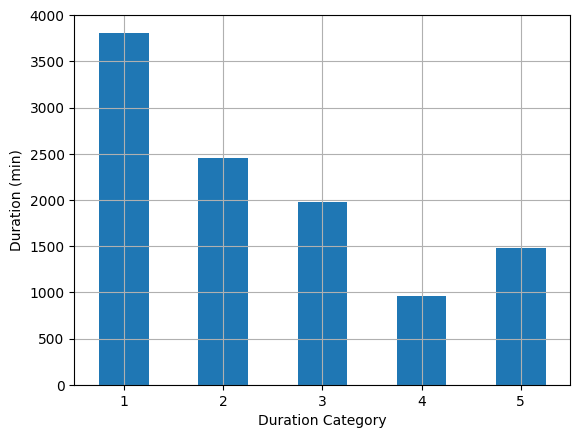

In [ ]:
flights["Duration_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Duration Category")
plt.ylabel("Duration (min)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    flights, test_size=0.2, stratify=flights["Duration_cat"], random_state=42)

We can see test if the test set reflects the distribution of the flight durations

In [ ]:
strat_test_set["Duration_cat"].value_counts() / len(strat_test_set)

,count
Duration_cat,
1,0.356575
2,0.229293
3,0.185307
5,0.138980
4,0.089846


In [ ]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop(["Duration_cat","Total_duration_min"], axis=1, inplace=True)

## Explore and Visualize the Data to Gain Insights

In [ ]:
flights = strat_train_set.copy()

Explore correlations

In [ ]:
corr_matrix = flights.select_dtypes(include=np.number).corr()

In [ ]:
corr_matrix["Price"].sort_values(ascending=False)

,Price
Price,1.000000
Total_Stops,0.595568
Duration_hours,0.501077
Arrival_hours,0.033292
Dep_hours,0.010309
Dep_min,-0.015256
Arrival_min,-0.086561
Month,-0.107112
Duration_min,-0.117506
Date,-0.153996


Should create date values to explore the relationship between days, months and price. Do this later on.

<function matplotlib.pyplot.show(close=None, block=None)>

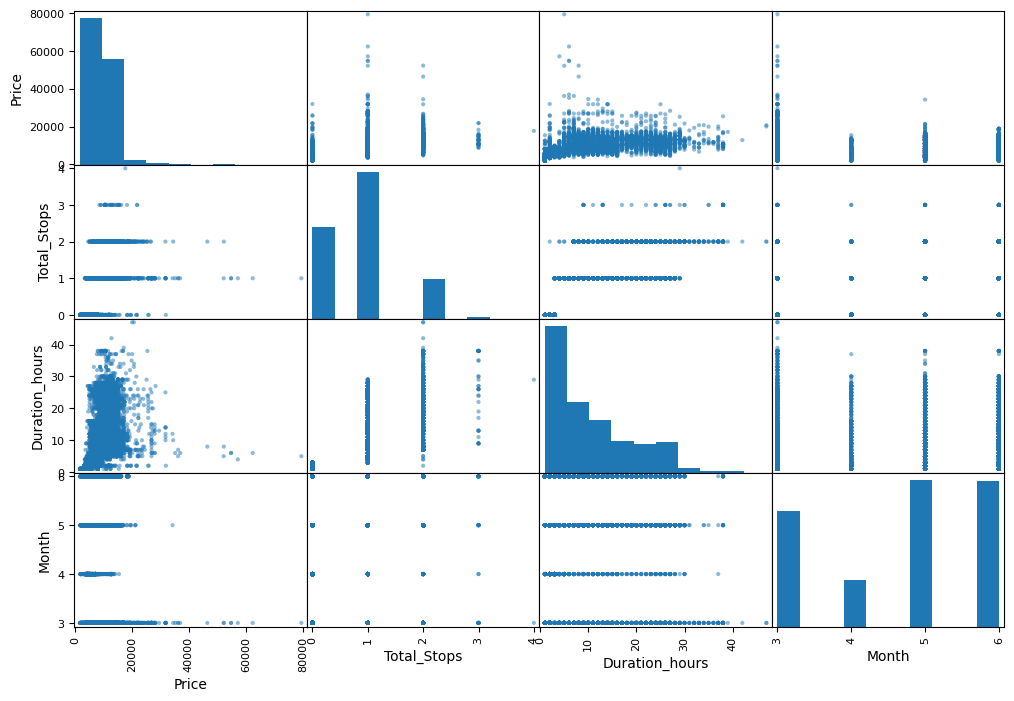

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Price","Total_Stops","Duration_hours","Month"]
scatter_matrix(flights[attributes], figsize=(12,8))
plt.show

Let's try and create some new attributes:
- Stops/Duration ratio (?)
- Can probably drop the Year attribute
- Should any work be done with the date attributes?
- Arrival / Departure times?
- Create Routes?

In [ ]:
flights["Year"].value_counts() # every year is the same
flights.drop("Year", axis=1, inplace=True)

In [ ]:
flights["Route"] = flights["Source"] + "->" + flights["Destination"]

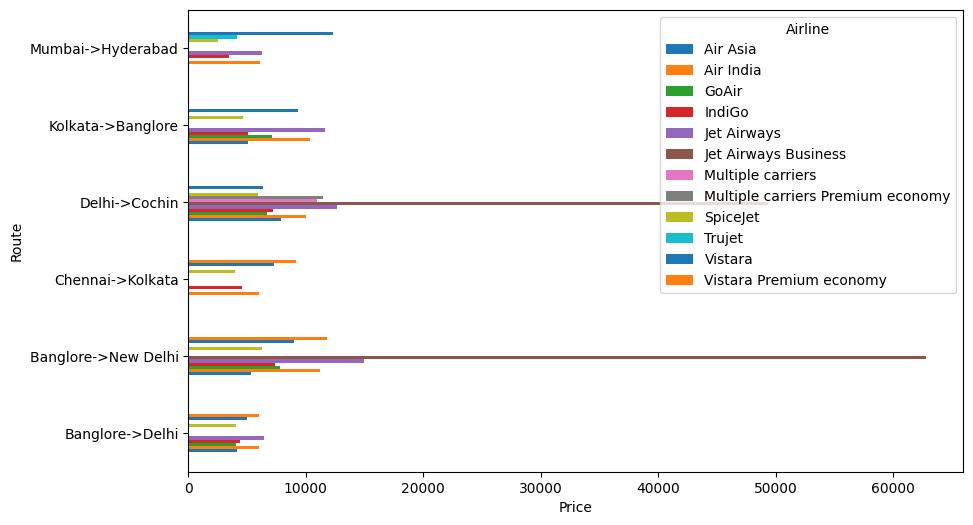

In [ ]:
mean_route_price = flights.groupby(["Route","Airline"])["Price"].mean().unstack()
mean_route_price.plot(kind='barh', stacked=False, figsize=(10,6))
plt.xlabel("Price")
plt.ylabel("Route")
plt.show()

In [ ]:
flights["Total_duration_min"] = (flights["Duration_hours"] * 60) + flights["Duration_min"]
flights["Stop_duration ratio"] = flights["Total_Stops"] / flights["Total_duration_min"]

corr_matrix = flights.select_dtypes(include=np.number).corr()
corr_matrix["Price"].sort_values(ascending=False)

,Price
Price,1.000000
Total_Stops,0.595568
Duration_hours,0.501077
Total_duration_min,0.499082
Stop_duration ratio,0.402774
Arrival_hours,0.033292
Dep_hours,0.010309
Dep_min,-0.015256
Arrival_min,-0.086561
Month,-0.107112


## Prepare the Data for Machine Learning Algorithms

In [ ]:
# Create copies of the training set and labels (strat_train is unaffected by drop)

flights = strat_train_set.drop("Price", axis=1) # inplace arg not provided

flights_labels = strat_train_set["Price"].copy()

Since there are no null values, we do not need to worry about imputation
Next we need to handle the text attributes (Airline, Source, Destination, Route)

In [ ]:
flights["Airline"].head(8)

,Airline
5257,Multiple carriers
7589,Jet Airways
7258,Multiple carriers
2594,Multiple carriers
10201,Jet Airways
5506,SpiceJet
9353,SpiceJet
6883,Air India


In [ ]:
from sklearn.preprocessing import OneHotEncoder

airline_cat_encoder = OneHotEncoder()
airline_1hot = airline_cat_encoder.fit_transform(flights[["Airline"]])

source_cat_encoder = OneHotEncoder()
source_1hot = source_cat_encoder.fit_transform(flights[["Source"]])

dest_cat_encoder = OneHotEncoder()
dest_1hot = dest_cat_encoder.fit_transform(flights[["Destination"]])

In [ ]:
airline_cat_encoder.get_feature_names_out()

array(['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara',
       'Airline_Vistara Premium economy'], dtype=object)

Feature Scaling and Transformation
- Total stops is between 0->3, while price is in the 0->30,000 range
- The month and date attributes are also in very low ranges (how to handle?)
- Departure and arrival times?
- Duration Hour + min

In [ ]:
# Using standardization
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
flights_num_std_scaled = std_scaler.fit_transform(flights.select_dtypes(include=[np.number]))

<Axes: >

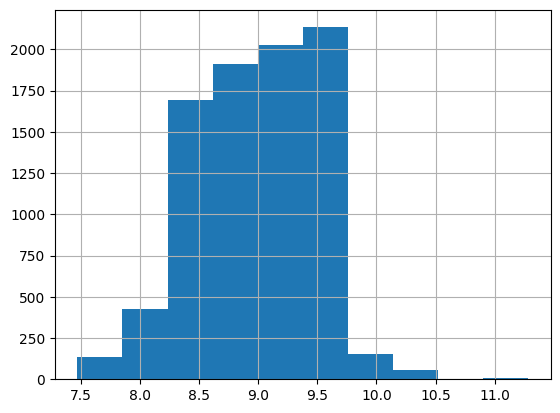

In [ ]:
# Log transformer for non-normally distributed numerical attributes

from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_price = log_transformer.transform(flights_labels)

log_price.hist()

array([[<Axes: title={'center': 'Duration_total'}>]], dtype=object)

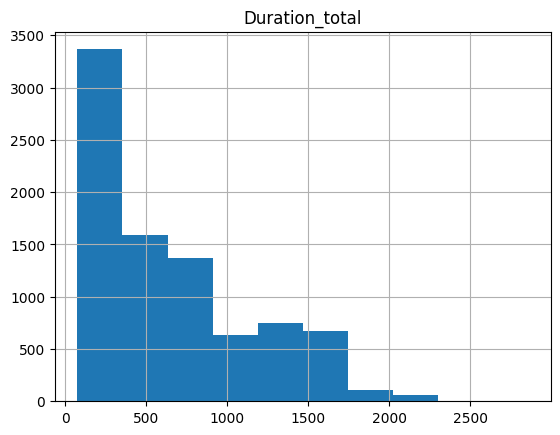

In [ ]:
# Custom transformer to plot total trip duration

time_transformer = FunctionTransformer(lambda X: (X[:, [0]] * 60) + X[:, [1]])

df_output = pd.DataFrame(
    time_transformer.transform(np.array(flights[["Duration_hours", "Duration_min"]])),
    columns=["Duration_total"],
    index=flights[["Duration_hours", "Duration_min"]].index)

df_output.hist()

In [ ]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])

Creating final pipelines

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

# Creating a custom class for feature engineering
class TimeTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, hours, mins):
    self.hours = hours
    self.mins = mins

  def fit(self, X, y=None):
    if hasattr(X, "columns"):
      self.feature_names_in_ = np.array(X.columns, dtype=object)
    self.n_features_in_ = X.shape[1]
    return self

  def transform(self, X):
    assert self.n_features_in_ == X.shape[1]
    X_new = X.copy()
    X_new['Total_duration_min'] = X_new[self.hours] * 60 + X_new[self.mins]
    return X_new

  def get_feature_names_out(self, input_features=None):
    if input_features is None:
            return getattr(self, "feature_names_in_",
                           [f"x{i}" for i in range(self.n_features_in_)])
    else:
      if len(input_features) != self.n_features_in_:
        raise ValueError("Invalid number of features")
      if hasattr(self, "feature_names_in_") and not np.all(
        self.feature_names_in_ == input_features
      ):
        raise ValueError("input_features ≠ feature_names_in_")
      return np.append(input_features, "Total_duration_min")


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer

def column_ratio(X):
  return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
  return ["ratio"]  # feature names out

def ratio_pipeline():
  return make_pipeline(
      SimpleImputer(strategy="median"),
      FunctionTransformer(column_ratio, feature_names_out=ratio_name),
      StandardScaler())

# log_pipeline = make_pipeline(
#     SimpleImputer(strategy="median"),
#     FunctionTransformer(np.log, feature_names_out="one-to-one"),
#     StandardScaler())

num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             StandardScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                             OneHotEncoder(handle_unknown="ignore"))

preprocessing = make_pipeline(
    TimeTransformer("Duration_hours", "Duration_min"),
    ColumnTransformer([
    ("stops_duration", ratio_pipeline(), ["Total_Stops", "Total_duration_min"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ("num", num_pipeline, make_column_selector(dtype_include=np.number))
    ], remainder=num_pipeline))

In [ ]:
flights_processed = preprocessing.fit_transform(flights)
flights_processed.shape

(8546, 35)

In [ ]:
preprocessing["columntransformer"].get_feature_names_out()

array(['stops_duration__ratio', 'cat__Airline_Air Asia',
       'cat__Airline_Air India', 'cat__Airline_GoAir',
       'cat__Airline_IndiGo', 'cat__Airline_Jet Airways',
       'cat__Airline_Jet Airways Business',
       'cat__Airline_Multiple carriers',
       'cat__Airline_Multiple carriers Premium economy',
       'cat__Airline_SpiceJet', 'cat__Airline_Trujet',
       'cat__Airline_Vistara', 'cat__Airline_Vistara Premium economy',
       'cat__Source_Banglore', 'cat__Source_Chennai', 'cat__Source_Delhi',
       'cat__Source_Kolkata', 'cat__Source_Mumbai',
       'cat__Destination_Banglore', 'cat__Destination_Cochin',
       'cat__Destination_Delhi', 'cat__Destination_Hyderabad',
       'cat__Destination_Kolkata', 'cat__Destination_New Delhi',
       'num__Total_Stops', 'num__Date', 'num__Month', 'num__Year',
       'num__Dep_hours', 'num__Dep_min', 'num__Arrival_hours',
       'num__Arrival_min', 'num__Duration_hours', 'num__Duration_min',
       'num__Total_duration_min'], dtype=ob

## Select and Train a Model

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(flights, flights_labels)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('timetransformer',
                                  TimeTransformer(hours='Duration_hours',
                                                  mins='Duration_min')),
                                 ('columntransformer',
                                  ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                               SimpleImputer(strategy='median')),
                                                                              ('standardscaler',
                                                                               StandardScaler())]),
                                                    transformers=[('stops_duration',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleI...
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x783560398040>),
                                                                  ('num',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x783560398790>)]))])),
                ('linearregression', LinearRegression())])

In [ ]:
price_predictions = lin_reg.predict(flights)

Simple one round prediction using linear regression.

In [ ]:
price_predictions[:5].round(-2)

array([10500., 12900., 12400.,  9500., 11600.])

In [ ]:
flights_labels.iloc[:5].values

array([ 8309, 10368, 17057, 10877, 11134])

In [ ]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(flights_labels, price_predictions, squared=False)
lin_rmse

2852.060086063688

Analyzing the values and the mean squared error, we can see that, on average, the prediction is ~2852 off.

In [ ]:
flights_labels.describe()

,Price
count,8546.000000
mean,9083.322724
std,4655.010354
min,1759.000000
25%,5234.250000
50%,8366.500000
75%,12373.000000
max,79512.000000


There is an error of around 2852.06, with the range of the prices mostly ranging between 5000-12000, so this is a pretty rough error. It can thus be assumed that underfitting is present

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Trying out decision tree regressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(flights, flights_labels)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('timetransformer',
                                  TimeTransformer(hours='Duration_hours',
                                                  mins='Duration_min')),
                                 ('columntransformer',
                                  ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                               SimpleImputer(strategy='median')),
                                                                              ('standardscaler',
                                                                               StandardScaler())]),
                                                    transformers=[('stops_duration',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleI...
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x783560398040>),
                                                                  ('num',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x783560398790>)]))])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
flight_predictions = tree_reg.predict(flights)
tree_rmse = mean_squared_error(flights_labels, flight_predictions, squared=False)
tree_rmse

781.614866682197

This is a much better error compared to the linear regressor, but it is a good idea to try cross validation.

In [ ]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, flights, flights_labels,
                              scoring="neg_root_mean_squared_error", cv=2)

# RMSE is a cost function, so result is multiplied by -1
pd.Series(tree_rmses).describe()

,0
count,2.000000
mean,2705.865204
std,22.881999
min,2689.685187
25%,2697.775196
50%,2705.865204
75%,2713.955213
max,2722.045221


Using cross-validation, the result is just as bad as the linear regression. However, there is argument to conclude it overfits the traininig data as the training error is much lower than the cross validation error.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Trying random forest regressor
forest_reg = make_pipeline(preprocessing,
                            RandomForestRegressor(random_state=42))

forest_rmses = -cross_val_score(forest_reg, flights, flights_labels,
                                 scoring="neg_root_mean_squared_error", cv=3)

In [ ]:
pd.Series(forest_rmses).describe()

,0
count,3.000000
mean,2133.533609
std,103.330390
min,2070.670011
25%,2073.905025
50%,2077.140039
75%,2164.965408
max,2252.790777


In [ ]:
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_rmse = -cross_val_score(lin_reg, flights, flights_labels,
                                 scoring="neg_root_mean_squared_error", cv=3)

In [ ]:
pd.Series(lin_rmse).describe().apply(lambda x: format(x, 'f'))

,0
count,3.000000
mean,18405657232964.046875
std,31879533469150.632812
min,2844.353251
25%,2910.247222
50%,2976.141193
75%,27608485848023.894531
max,55216971693071.648438


Using cross validation, the RandomForestRegressor performs the best. The linear regressor seems to output erroneous values as seen in the above table.

## Fine-Tune Your Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

param_distribs = {'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring="neg_root_mean_squared_error", random_state=42)

rnd_search.fit(flights,flights_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              Pipeline(steps=[('timetransformer',
                                                               TimeTransformer(hours='Duration_hours',
                                                                               mins='Duration_min')),
                                                              ('columntransformer',
                                                               ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                                            SimpleImputer(strategy='median')),
                                                                                                           ('standardscaler',
                                                                                                            StandardScaler())]),
                                                                                 transformers=[('stops_duration',
                                                                                                P...
                                                                                                                 StandardScaler())]),
                                                                                                <sklearn.compose._column_transformer.make_column_selector object at 0x783560398790>)]))])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x783560399ab0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
rnd_search.best_params_

{'random_forest__max_features': 16}

In [ ]:
# With best parameters (very simple)
forest_reg = make_pipeline(preprocessing,
                            RandomForestRegressor(random_state=42, max_features=16))
forest_rmses = -cross_val_score(forest_reg, flights, flights_labels,
                                 scoring="neg_root_mean_squared_error", cv=3)

pd.Series(forest_rmses).describe()

,0
count,3.000000
mean,2087.036058
std,11.506676
min,2074.454480
25%,2082.041237
50%,2089.627994
75%,2093.326847
max,2097.025700


By altering the parameters, some slight optimizations were made.

In [ ]:
# Analyzing the errors
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.06, 0.  , 0.01, 0.  , 0.03, 0.06, 0.06, 0.01, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.02, 0.07, 0.14, 0.05, 0.  , 0.02, 0.02, 0.02, 0.02, 0.13,
       0.02, 0.22])

In [ ]:
sorted(zip(feature_importances,
           final_model["preprocessing"][-1].get_feature_names_out()),
     reverse=True)

[(0.21742475594095834, 'num__Total_duration_min'),
 (0.14402900948391484, 'num__Date'),
 (0.13472510516611516, 'num__Duration_hours'),
 (0.06703435634096254, 'num__Total_Stops'),
 (0.0639514380917362, 'cat__Airline_Jet Airways Business'),
 (0.06202615517872893, 'stops_duration__ratio'),
 (0.05764712446213057, 'cat__Airline_Jet Airways'),
 (0.051071845307316524, 'num__Month'),
 (0.02718035109114947, 'cat__Airline_IndiGo'),
 (0.024399354928733193, 'num__Arrival_hours'),
 (0.023617448041064706, 'num__Dep_hours'),
 (0.01985420757559607, 'num__Dep_min'),
 (0.019635009844076956, 'num__Arrival_min'),
 (0.01592825831100185, 'num__Duration_min'),
 (0.01582753718482795, 'cat__Destination_New Delhi'),
 (0.01123876865413584, 'cat__Airline_Multiple carriers'),
 (0.007294860413035256, 'cat__Source_Banglore'),
 (0.00589287711704798, 'cat__Airline_Air India'),
 (0.003751150504761472, 'cat__Airline_SpiceJet'),
 (0.003525383599645599, 'cat__Source_Kolkata'),
 (0.003464253594777192, 'cat__Source_Delhi'),

The airlines and souce/destination features don't seem to do as well as they could. I will do some additional preprocessing based on two approaches I've seen.
1. Create route feature and delete source/destination features, also remove duration hours/minutes
2. Edit outliers and feature distributions while keeping original parameters the same

## ROUTE/HOUR FEATURE ENGINEERING

In [ ]:
class DropFeatureSelector(BaseEstimator, TransformerMixin):
  def __init__(self, variables):
    self.variables = variables

  def fit(self, X, y=None):
    if hasattr(X, "columns"):
      self.feature_names_in_ = np.array(X.columns, dtype=object)
    self.n_features_in_ = X.shape[1]
    return self

  def transform(self, X):
    assert self.n_features_in_ == X.shape[1]
    X_dropped = X.drop(self.variables, axis=1)
    self.columns = X_dropped.columns
    return X_dropped

  def get_feature_names_out(self, input_features=None):
    if input_features is None:
            return getattr(self, "feature_names_in_",
                           [f"x{i}" for i in range(self.n_features_in_)])
    else:
      if len(input_features) != self.n_features_in_:
        raise ValueError("Invalid number of features")
      if hasattr(self, "feature_names_in_") and not np.all(
        self.feature_names_in_ == input_features
      ):
        raise ValueError("input_features ≠ feature_names_in_")
      return self.columns

In [ ]:
class RouteCreator(BaseEstimator, TransformerMixin):
  def __init__(self, source, destination):
    self.source = source
    self.destination = destination

  def fit(self, X, y=None):
    if hasattr(X, "columns"):
      self.feature_names_in_ = np.array(X.columns, dtype=object)
    self.n_features_in_ = X.shape[1]
    return self

  def transform(self, X):
    assert self.n_features_in_ == X.shape[1]
    X_new = X.copy()
    X_new['Route'] = X_new[self.source] + "->" + X_new[self.destination]
    return X_new

  def get_feature_names_out(self, input_features=None):
    if input_features is None:
            return getattr(self, "feature_names_in_",
                           [f"x{i}" for i in range(self.n_features_in_)])
    else:
      if len(input_features) != self.n_features_in_:
        raise ValueError("Invalid number of features")
      if hasattr(self, "feature_names_in_") and not np.all(
        self.feature_names_in_ == input_features
      ):
        raise ValueError("input_features ≠ feature_names_in_")
      return np.append(input_features, "Route")

In [ ]:
attributes_to_drop = [
    "Year","Duration_min","Duration_hours","Source","Destination"]

preprocessing = make_pipeline(
    RouteCreator("Source","Destination"),
    TimeTransformer("Duration_hours", "Duration_min"),
    DropFeatureSelector(attributes_to_drop),
    ColumnTransformer([
    ("stops_duration", ratio_pipeline(), ["Total_Stops", "Total_duration_min"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ("num", num_pipeline, make_column_selector(dtype_include=np.number))
    ], remainder=num_pipeline))

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

In [ ]:
param_distribs = {'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring="neg_root_mean_squared_error", random_state=42)

rnd_search.fit(flights,flights_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              Pipeline(steps=[('routecreator',
                                                               RouteCreator(destination='Destination',
                                                                            source='Source')),
                                                              ('timetransformer',
                                                               TimeTransformer(hours='Duration_hours',
                                                                               mins='Duration_min')),
                                                              ('dropfeatureselector',
                                                               DropFeatureSelector(variables=['Year',
                                                                                              'Duration_min',
                                                                                              'Duration_hours',
                                                                                              'Source',
                                                                                              'Destination...
                                                                                                                 StandardScaler())]),
                                                                                                <sklearn.compose._column_transformer.make_column_selector object at 0x7835604817b0>)]))])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x783560398e50>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
rnd_search.best_params_

{'random_forest__max_features': 12}

In [ ]:
# With best parameters (very simple)
forest_reg = make_pipeline(preprocessing,
                            RandomForestRegressor(random_state=42, max_features=12))
forest_rmses = -cross_val_score(forest_reg, flights, flights_labels,
                                 scoring="neg_root_mean_squared_error", cv=3)

pd.Series(forest_rmses).describe()

,0
count,3.000000
mean,2054.179041
std,8.064411
min,2045.840510
25%,2050.299526
50%,2054.758542
75%,2058.348306
max,2061.938070


Compared to the original mean squared error given (~2087) without the addition of the route feature and the removal of other features, there is a slight improvement.

Analyzing Feature Importances:

In [ ]:
# Analyzing the errors
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.12, 0.  , 0.01, 0.  , 0.03, 0.07, 0.06, 0.01, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.02, 0.  , 0.01, 0.01, 0.01, 0.12, 0.14, 0.06,
       0.03, 0.02, 0.03, 0.02, 0.23])

In [ ]:
sorted(zip(feature_importances,
           final_model["preprocessing"][-1].get_feature_names_out()),
     reverse=True)

[(0.23153211323626663, 'num__Total_duration_min'),
 (0.13644195497408418, 'num__Date'),
 (0.12064018500997647, 'stops_duration__ratio'),
 (0.12061546796698729, 'num__Total_Stops'),
 (0.06682070387644483, 'cat__Airline_Jet Airways'),
 (0.06315474511620389, 'cat__Airline_Jet Airways Business'),
 (0.05830734258912449, 'num__Month'),
 (0.030853599698925833, 'cat__Airline_IndiGo'),
 (0.02817516466139163, 'num__Arrival_hours'),
 (0.027381685038240827, 'num__Dep_hours'),
 (0.02386769678274458, 'num__Dep_min'),
 (0.021315927470563312, 'num__Arrival_min'),
 (0.020987628373715473, 'cat__Route_Banglore->New Delhi'),
 (0.010930544239291726, 'cat__Airline_Multiple carriers'),
 (0.00771099328136806, 'cat__Route_Delhi->Cochin'),
 (0.0070112699802480204, 'cat__Airline_Air India'),
 (0.005879413267578406, 'cat__Route_Mumbai->Hyderabad'),
 (0.005681933194600091, 'cat__Route_Kolkata->Banglore'),
 (0.0035741260273358397, 'cat__Airline_SpiceJet'),
 (0.002530012045942098, 'cat__Airline_Vistara'),
 (0.002194

## EVALUATE ON THE TEST SET



In [ ]:
X_test = strat_test_set.drop("Price", axis=1)
y_test = strat_test_set["Price"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

1904.3835094826884


In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([1638.09812441, 2137.7529411 ])

According to the final rmse of the model against the test set, it performed better than on the validation sets, with an average error of ~1904, and a 95% confidence interval of between 1638-2138.

In [ ]:
# Comparing target values
og_price = y_test.to_numpy().round(0)
final_pred_arr = final_predictions.flatten().round(0)

compare_prices = pd.DataFrame({
    "Original Price": og_price,
    "Model Prediction": final_pred_arr,
    "Error Value": abs(og_price - final_pred_arr),
    "Error %": (abs(og_price - final_pred_arr) / og_price) * 100,
})

compare_prices.head(10)

,Original Price,Model Prediction,Error Value,Error %
0,10368,11789.0,1421.0,13.705633
1,15812,18330.0,2518.0,15.924614
2,12898,14694.0,1796.0,13.924639
3,5277,5277.0,0.0,0.000000
4,10539,13001.0,2462.0,23.360850
5,4575,4653.0,78.0,1.704918
6,7229,4969.0,2260.0,31.262969
7,13067,12640.0,427.0,3.267774
8,8610,8945.0,335.0,3.890825
9,5975,5534.0,441.0,7.380753


The model tends to produce reasonable values (no extraneous values such as negative prices). In fact, the mean price is very similar to the orignal mean price noted in the initial EDA.

In [ ]:
pd.Series(final_predictions).describe()

,0
count,2137.000000
mean,9065.544584
std,4054.086260
min,1970.806667
25%,5537.982000
50%,8892.899167
75%,12060.355000
max,32708.310000


Some possible improvements could be removing redundant features based on the feature importances using the SciKit Learn 'SelectFromModel' transformer. Can also remove outliers and attempt more preprocessing on numerical features (log scaling, normalization, etc.)

## Utilizing PCA for Dimensional Reduction

In [ ]:
len(final_model["preprocessing"][-1].get_feature_names_out())

27

In [ ]:
from sklearn.decomposition import PCA

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("pca", PCA(random_state=42)),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

# There are 27 features after preprocessing
param_distribs = {
    'pca__n_components': np.arange(2, 27),
    'random_forest__max_features': randint(low=2, high=20)
}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring="neg_root_mean_squared_error", random_state=42)

rnd_search.fit(flights,flights_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              Pipeline(steps=[('routecreator',
                                                               RouteCreator(destination='Destination',
                                                                            source='Source')),
                                                              ('timetransformer',
                                                               TimeTransformer(hours='Duration_hours',
                                                                               mins='Duration_min')),
                                                              ('dropfeatureselector',
                                                               DropFeatureSelector(variables=['Year',
                                                                                              'Duration_min',
                                                                                              'Duration_hours',
                                                                                              'Source',
                                                                                              'Destination...
                                             ('pca', PCA(random_state=42)),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'pca__n_components': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26]),
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x783563042a70>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
rnd_search.best_params_

{'pca__n_components': 25, 'random_forest__max_features': 13}

In [ ]:
rnd_search.best_score_ # Output is -2294?

-2294.6932717184295

In [ ]:
final_predictions = rnd_search.best_estimator_.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

2186.031804077095


The model performs best before PCA dim reduction.

## Chapter 10 - ANNs


Using Sklean MLPRegressor

In [ ]:
X_train_full = strat_train_set.drop("Price", axis=1)

y_train_full = strat_train_set["Price"].copy()

In [ ]:
# manually create subset of training data
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

In [ ]:
# num_pipeline, cat_pipeline

In [ ]:
# (Test) X_test, y_test, (Training): flights, fights_labels
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(preprocessing, mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Warning - maximum iterations reached
rmse

2555.7254956937763

Using the same preprocessing as before and 50 neurons for each hidden layer, the MLPRegressor does not converge. The given RMSE is 2556, which is worse than our current best model using the RandomForestRegressor.

### Using TensorFlow


In [ ]:
X_train.shape[1:]

(13,)

In [ ]:
full_pipeline["preprocessing"][-1].get_feature_names_out().shape

(27,)

In [ ]:
# Wrapping with scikit learn for now
import tensorflow as tf

tf.random.set_seed(42)

def create_model():
    model = tf.keras.Sequential([
      tf.keras.layers.Input(pipeline["pre"][-1].get_feature_names_out().shape),
      tf.keras.layers.Dense(50, activation="relu"),
      tf.keras.layers.Dense(50, activation="relu"),
      tf.keras.layers.Dense(50, activation="relu"),
      tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
    return model

In [ ]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 59.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
from scikeras.wrappers import KerasRegressor

keras_regressor = KerasRegressor(build_fn=create_model, epochs=30)

# history = model.fit(X_train, y_train, epochs=20,
#                     validation_data=(X_valid, y_valid))
pipeline = Pipeline([
    ('pre', preprocessing),
    ('keras', keras_regressor)
])

pipeline.fit(X_train, y_train)

rmse = pipeline.score(X_valid, y_valid)
# X_new = X_test[:3]
# y_pred = model.predict(X_new)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 10041.8281 - loss: 100882688.0000
Epoch 2/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 4343.4087 - loss: 19258974.0000
Epoch 3/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 3068.2859 - loss: 9421606.0000
Epoch 4/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 2929.7446 - loss: 8591386.0000
Epoch 5/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 2869.1523 - loss: 8239857.5000
Epoch 6/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 2833.4888 - loss: 8036203.5000
Epoch 7/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 2806.6604 - loss: 7884617.0000
Epoch 8/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 2783.5747 - loss: 7755316.5000
Epoch 9/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 2762.8228 - loss: 7640008.5000
Epoch 10/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 